## 1. DBPIA 논문 데이터 크롤링
- 목적 : 기본 페이지 정보 + 상세 페이지로 접근을 해서 데이터를 가져오기

In [1]:
from selenium import webdriver
from selenium.webdriver.common.by import By
import time

In [47]:
browser= webdriver.Chrome()

In [48]:
# 1) 찾고자 하는 검색어 입력

search_word = input("검색하시고자 하는 논문의 제목을 입력해주세요.")

url = 'https://www.dbpia.co.kr/search/topSearch?searchOption=all&query={}'
final_url = url.format(search_word)
print(final_url)

browser.get(final_url)
browser.implicitly_wait(5)

검색하시고자 하는 논문의 제목을 입력해주세요.인공지능
https://www.dbpia.co.kr/search/topSearch?searchOption=all&query=인공지능


In [49]:
# 2) 각 페이지 링크 찾아서 클릭

for i in range(1,3) :
    XPATH = '//*[@id="pageList"]/a[{}]' # ''안에 있으니까, {}안에도 문자, i가 문자
    XPATH = XPATH.format(str(i)) #  i를 string 으로 변환
    
    browser.find_element(By.XPATH, XPATH).click()
    #print(XPATH)
    time.sleep(5)

In [ ]:
### 페이지 규칙찾기

[@id="pageList"]/a[1] # 1페이지
[@id="pageList"]/a[2] # 2페이지
[@id="pageList"]/a[3] # 3페이지

[@id="pageList"]/a[1] # 11페이지 (1페이지와 같이 구성됨)

for i range(10): 
    
    browser.find_element(By.ID, 'goNextPage').click() # 10페이지까지 클릭 후 > 다음버튼 클릭

In [ ]:
# 3) 상세페이지 이동(비추천)

links = browser.find_elements(By.CLASS_NAME, 'thesis__link')

content_list = []

for link in links :
    link = browser.find_element(By.CLASS_NAME, 'thesis__link').get_attribute('href')
    
     
# 4) 세부 페이지 접근 & 데이터 가져오기

    browser.get(link) # 세부 페이지 접근
    time.sleep(3) # 로딩 시간
    
    try :
        content = browser.find_element(By.CLASS_NAME, 'abstractTxt').text  
    except:
        content = 'none' # 초록,키워드에 내용이 없는 경우
        
    content_list.append(content)
    browser.back() # 뒤로가기

print(content_list)

In [50]:
# 3) 상세페이지 이동(추천 : 한번에 링크 다 가져오기, 뒤로가기가 필요없음 !)
containers = browser.find_elements(By.CLASS_NAME, 'thesis__summary')

link_list = []
for container in containers :
    link = container.find_element(By.CLASS_NAME, 'thesis__link').get_attribute('href')
    link_list.append(link)   

print(link_list)

# 4) 세부 페이지 접근 & 데이터 가져오기

content_list = []
for link in link_list:
    browser.get(link)
    time.sleep(3)
    
    try :
        content = browser.find_element(By.CLASS_NAME, 'abstractTxt').text  
    except:
        content = 'none' # 초록,키워드에 내용이 없는 경우
        
    content_list.append(content)

print(content_list)

['https://www.dbpia.co.kr/journal/articleDetail?nodeId=NODE11193927', 'https://www.dbpia.co.kr/journal/articleDetail?nodeId=NODE11193925', 'https://www.dbpia.co.kr/journal/articleDetail?nodeId=NODE11169216', 'https://www.dbpia.co.kr/journal/articleDetail?nodeId=NODE11171767', 'https://www.dbpia.co.kr/journal/articleDetail?nodeId=NODE11180230', 'https://www.dbpia.co.kr/journal/articleDetail?nodeId=NODE11192869', 'https://www.dbpia.co.kr/journal/articleDetail?nodeId=NODE11169214', 'https://www.dbpia.co.kr/journal/articleDetail?nodeId=NODE11169215', 'https://www.dbpia.co.kr/journal/articleDetail?nodeId=NODE11169218', 'https://www.dbpia.co.kr/journal/articleDetail?nodeId=NODE11169268', 'https://www.dbpia.co.kr/journal/articleDetail?nodeId=NODE11183871', 'https://www.dbpia.co.kr/journal/articleDetail?nodeId=NODE11169217', 'https://www.dbpia.co.kr/journal/articleDetail?nodeId=NODE11167173', 'https://www.dbpia.co.kr/journal/articleDetail?nodeId=NODE11166367', 'https://www.dbpia.co.kr/journal/

In [ ]:
# 상세 페이지의 이동(링크로 바로 접근)

## 1건
browser.find_element(By.CLASS_NAME, 'thesis__link').get_attribute('href') 

## 여러건
links = browser.find_elements(By.CLASS_NAME, 'thesis__link')
for i in links :
    print(i.get_attribute('href'))
    
    
# 상세 페이지의 이동(컨테이너로 접근: 부모>자식 )

containers = browser.find_elements(By.CLASS_NAME, 'thesis_summary')
for container in containers:
    print(container.find_element(By.CLASS_NAME, 'thesis_link').get_attribute('href'))
    

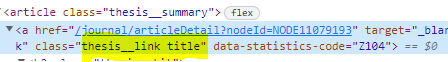

In [41]:
import time
#각 페이지의 URL 가져오기

links = browser.find_elements(By.CLASS_NAME,'thesis__link')
#print(links)

link_list = []
for element in links:
    link = element.get_attribute('href')
    link_list.append(link)
    
#여기서 element = a 태그 ! 
#속성가져오기 : get_attribute

#print(link_list)

########중간 팝업 !!!! 해결해야함 ########
for i in range(1,11):
    browser.find_element(By.XPATH, '//*[@id="#pub_noticeLayerPopup93"]').click(str(i)) # 중간 팝업창 끄기


#1-1) link 접근해서 내용 가져오기(링크 가져오기 가능하면, 링크로 가져오기)
content_list = []
for link in link_list:
    browser.get(link) 
    time.sleep(5)
    
  #데이터 없는 경우도 있음 
    try: 
        content = browser.find_element(By.CLASS_NAME, 'abstracTxt').text
    except:   
        content = 'vacant'
    
    content_list.append(content)

    print(content_list)

TypeError: click() takes 1 positional argument but 2 were given

In [ ]:
content_list = []
for link in link_list:
    browser.get(link)
    time.sleep(3)
    try:
        content = browser.find_element(By.CLASS_NAME, 'abstractTxt').text
        print(content)
        content_list.append(content)
    except:
        print("pass")
        content_list.append("empty")
    
print(content_list)

In [20]:
#1-2) 부모태그로 접근> 자식태그
##'thesis_summary'로 가져왔을 경우,

#containers = browser.find_elements(By.CLASS_NAME,'thesis__summary')
#for container in containers:
    #print(container.find_element(By.CLASS_NAME,'thesis__link').get_attribute('href'))

https://www.dbpia.co.kr/journal/articleDetail?nodeId=NODE11112269
https://www.dbpia.co.kr/journal/articleDetail?nodeId=NODE10596712
https://www.dbpia.co.kr/journal/articleDetail?nodeId=NODE10599275
https://www.dbpia.co.kr/journal/articleDetail?nodeId=NODE10600890
https://www.dbpia.co.kr/journal/articleDetail?nodeId=NODE10594647
https://www.dbpia.co.kr/journal/articleDetail?nodeId=NODE10595557
https://www.dbpia.co.kr/journal/articleDetail?nodeId=NODE10606957
https://www.dbpia.co.kr/journal/articleDetail?nodeId=NODE10606958
https://www.dbpia.co.kr/journal/articleDetail?nodeId=NODE10602665
https://www.dbpia.co.kr/journal/articleDetail?nodeId=NODE10593327
https://www.dbpia.co.kr/journal/articleDetail?nodeId=NODE10590917
https://www.dbpia.co.kr/journal/articleDetail?nodeId=NODE10593260
https://www.dbpia.co.kr/journal/articleDetail?nodeId=NODE10593199
https://www.dbpia.co.kr/journal/articleDetail?nodeId=NODE10571551
https://www.dbpia.co.kr/journal/articleDetail?nodeId=NODE10592389
https://ww

In [ ]:
##csv로 다운받기

## 2. 슬랙 BOT 

In [ ]:
import requests
import json

def send_slack_message():
    slack_url = 'Webhook URL'
    message= """    # 여기에 넣고 싶은 텍스트, 이미지, 파일 등등 넣으면 됨 !
    여러분 화이팅  
    """


    payloads = {
        "text": message  ,
        'user_name' : '수업 신청',
        'icon_emoji' : ':clap:'
    }


    response = requests.post(
        slack_url, data=json.dumps(payloads),
        headers = {'Content-type': 'application/json'}
    )
   
    if response.status_code !=200:
        print('error' + response.status_code)


    send_slack_message()

In [ ]:
# 크롤링 데이터 있을 경우,

import requests
import json

crawling_data = []

def send_slack_message(message):
    slack_url = 'Webhook URL'
    message= """    # 여기에 넣고 싶은 텍스트, 이미지, 파일 등등 넣으면 됨 !
    제목 : {}
    링크 : {}
    내용 : {}
    """.format('title','link', 'content')


    payloads = {
        "text": message  ,
        'user_name' : '수업 신청',
        'icon_emoji' : ':clap:'
    }


    response = requests.post(
        slack_url, data=json.dumps(payloads),
        headers = {'Content-type': 'application/json'}
    )
   
    if response.status_code !=200:
        print('error' + response.status_code)


for i in range(1,10)
    send_slack_message(crawling_data)  
    
    
    